In [1]:
# To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import the libraries to handle the np array, pandas dataframe, and visualiztion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import prepare.py to prepare the dataset
import prepare, explore

import psutil
from tqdm.notebook import tqdm

### Acquire the data

In [6]:
# Define the data types
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16", 
    "content_type_id": "boolean", 
    "task_container_id": "int16",
    "user_answer": "int8", 
    "answered_correctly": "int8", 
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"    
}

# Acquire the history of the users in the test dataset
df_train = pd.read_csv('users_history_test.csv', index_col=0, dtype=dtypes)

# Load the questions.csv with tag_counts
df_ques = pd.read_csv('questions_with_tag_counts.csv', index_col=0)

# Load the lectures.csv with part_name
df_lects = pd.read_csv('lectures_with_part_name.csv', index_col=0)

# Print the shape of the datasets
df_train.shape, df_ques.shape, df_lects.shape

((72719, 10), (13523, 6), (418, 5))

In [7]:
# Inpsect the train dataset
df_train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,25924315,0,554169193,3927,False,0,1,1,NaN,<NA>
1,25924316,24904,554169193,939,False,1,0,1,23000.0,False
2,25924317,59273,554169193,6683,False,2,1,0,19000.0,False
3,25924318,95917,554169193,5658,False,3,3,1,30000.0,False
4,25924319,112132,554169193,6202,False,4,2,1,31000.0,False


In [8]:
# Quick summary of train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72719 entries, 0 to 72718
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   row_id                          72719 non-null  int64  
 1   timestamp                       72719 non-null  int64  
 2   user_id                         72719 non-null  int32  
 3   content_id                      72719 non-null  int16  
 4   content_type_id                 72719 non-null  boolean
 5   task_container_id               72719 non-null  int16  
 6   user_answer                     72719 non-null  int8   
 7   answered_correctly              72719 non-null  int8   
 8   prior_question_elapsed_time     71286 non-null  float32
 9   prior_question_had_explanation  72678 non-null  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(2), int8(2)
memory usage: 2.9 MB


In [13]:
# Drop column content_type_id and user_answer in the df_train
df_train.drop(columns=['content_type_id', 'user_answer'], inplace=True)

In [9]:
# Inspect the df_ques
df_ques.head()

,question_id,bundle_id,correct_answer,part,tags,tag_count
0,0,0,0,1,51 131 162 38,4
1,1,1,1,1,131 36 81,3
2,2,2,0,1,131 101 162 92,4
3,3,3,0,1,131 149 162 29,4
4,4,4,3,1,131 5 162 38,4


In [15]:
# Drop the column `correct_answer` and 'tags' in df_ques
df_ques.drop(columns=['correct_answer', 'tags'], inplace=True)

In [10]:
# Inspect the df_lects
df_lects.head()

,lecture_id,tag,part,type_of,part_content
0,89,159,5,concept,Incomplete Sentences
1,100,70,1,concept,Photographs
2,185,45,6,concept,Text Completion
3,192,79,5,solving question,Incomplete Sentences
4,317,156,5,solving question,Incomplete Sentences


In [17]:
# Drop column `part` in the df_lects
df_lects.drop(columns=['part'], inplace=True)

In [18]:
# Merge the users' history with the df_ques
df = df_train.merge(df_ques, how='left', left_on='content_id', right_on='question_id')

# Merge the new dataframe with df_lects
df = df.merge(df_lects, how='left', left_on='content_id', right_on='lecture_id')

# Print the first 5 rows of the new dataframe
df.head()

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tag_count,lecture_id,tag,type_of,part_content
0,25924315,0,554169193,3927,0,1,NaN,<NA>,3927.0,3927.0,5.0,1.0,NaN,NaN,NaN,NaN
1,25924316,24904,554169193,939,1,1,23000.0,False,939.0,939.0,2.0,6.0,NaN,NaN,NaN,NaN
2,25924317,59273,554169193,6683,2,0,19000.0,False,6683.0,6683.0,5.0,1.0,NaN,NaN,NaN,NaN
3,25924318,95917,554169193,5658,3,1,30000.0,False,5658.0,5658.0,5.0,1.0,NaN,NaN,NaN,NaN
4,25924319,112132,554169193,6202,4,1,31000.0,False,6202.0,6202.0,5.0,1.0,NaN,NaN,NaN,NaN


In [25]:
df.user_id.unique()

array([ 554169193, 1720860329,  288641214, 1728340777, 1364159702,
       1521618396, 1317245193, 1700555100,  998511398, 1422853669,
       1096784725,  385471210, 1202386221, 2018567473, 1233875513,
        891955351, 1981166446, 1637273633, 2030979309,  319060572,
         98059812,  674533997,  555691277,  775113212, 1219481379,
       1148874033, 1281335472, 2002570769,  706626847, 1357500007,
       1599808246, 1305988022, 1310228392, 2093197291, 1468996389,
       1838324752, 2103436554,  311890082, 1817433235, 1900527744,
          7792299], dtype=int32)

In [29]:
mask = df.user_id == 1720860329
df[mask].shape

(265, 16)

In [32]:
df[mask].tail(60)

,row_id,timestamp,user_id,content_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,part,tag_count,lecture_id,tag,type_of,part_content
5564,80862746,3653705572,1720860329,1936,180,0,33333.0,True,1936.0,1934.0,3.0,4.0,NaN,NaN,NaN,NaN
5565,80862747,3653904457,1720860329,2219,181,1,79000.0,True,2219.0,2218.0,3.0,3.0,NaN,NaN,NaN,NaN
5566,80862748,3653904457,1720860329,2218,181,1,79000.0,True,2218.0,2218.0,3.0,3.0,NaN,NaN,NaN,NaN
5567,80862749,3653904457,1720860329,2220,181,0,79000.0,True,2220.0,2218.0,3.0,3.0,NaN,NaN,NaN,NaN
5568,80862750,3654065911,1720860329,1721,182,1,31666.0,True,1721.0,1721.0,3.0,3.0,NaN,NaN,NaN,NaN
5569,80862751,3654065911,1720860329,1722,182,1,31666.0,True,1722.0,1721.0,3.0,3.0,NaN,NaN,NaN,NaN
5570,80862752,3654065911,1720860329,1723,182,1,31666.0,True,1723.0,1721.0,3.0,3.0,NaN,NaN,NaN,NaN
5571,80862753,3874794810,1720860329,9077,177,1,41000.0,False,9077.0,9077.0,5.0,1.0,NaN,NaN,NaN,NaN
5572,80862754,3960612215,1720860329,1146,184,1,40000.0,True,1146.0,1146.0,2.0,4.0,NaN,NaN,NaN,NaN
5573,80862755,3960649408,1720860329,12047,185,1,24000.0,True,12047.0,12047.0,2.0,4.0,NaN,NaN,NaN,NaN


In [60]:
df.groupby('task_container_id').lecture_id.value_counts()

task_container_id  lecture_id
0                  185.0         1
                   8233.0        1
2                  335.0         1
5                  8317.0        1
7                  185.0         1
                                ..
6779               22836.0       1
6787               11877.0       1
6819               21597.0       1
6846               7704.0        1
6910               20791.0       1
Name: lecture_id, Length: 2259, dtype: int64

In [73]:
df.task_container_id.value_counts()

14      63
15      63
79      62
25      60
31      57
        ..
6344     1
6555     1
6408     1
6472     1
6302     1
Name: task_container_id, Length: 6956, dtype: int64

<AxesSubplot:xlabel='task_container_id'>

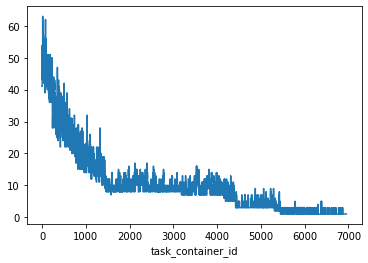

In [81]:
df.groupby('task_container_id').size().plot()

<AxesSubplot:xlabel='question_id'>

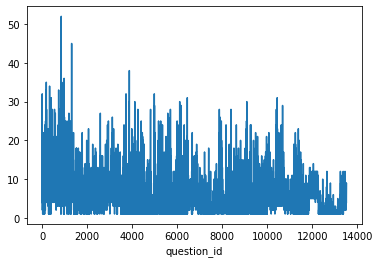

In [84]:
df.groupby('question_id').size().plot()

In [36]:
df.bundle_id.nunique()

8498

### Question to answer: How does the explanation affect the accuracy on different Parts?

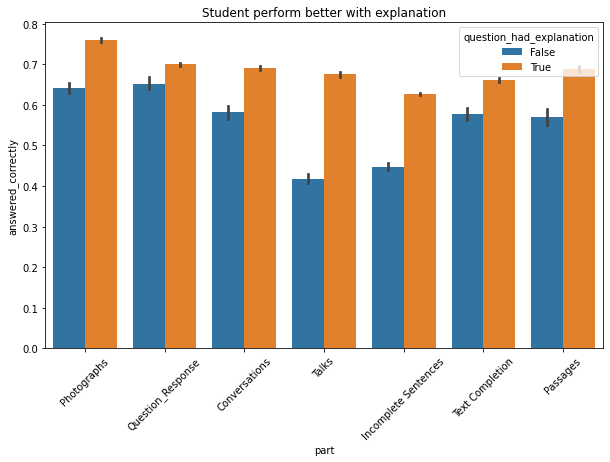

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='part', y='answered_correctly', hue='question_had_explanation')
plt.xticks(np.arange(0,7), 
           labels=['Photographs', 'Question_Response', "Conversations", 
                   "Talks", "Incomplete Sentences", "Text Completion", "Passages"], rotation=45)
plt.title("Student perform better with explanation")
plt.show()

### How does explanation affect Reading vs. Listening sections? 

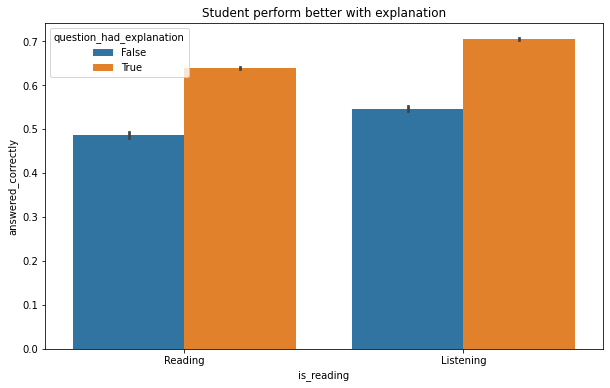

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='is_reading', y='answered_correctly', hue='question_had_explanation')
plt.title("Student perform better on question with explanation")
plt.show()

### Question to answer: Do the students watching more lectures perform better? 

In [52]:
user_lectures = train.groupby('user_id').user_lectures_running_total.max().sort_values(ascending=False)
user_lectures = pd.DataFrame(user_lectures)
user_lectures

,user_lectures_running_total
user_id,
1991343787,250
856894755,203
2042598372,200
634707013,185
1818053521,176
...,...
1303908446,0
1305224407,0
1307259774,0


In [53]:
user_acc_mean = train.groupby('user_id').user_acc_mean.mean().sort_values(ascending=False)
user_acc_mean

user_id
948981228     1.000000
587629436     0.958333
1664729180    0.958333
740684598     0.958333
1419533433    0.937500
                ...   
1052855624    0.083333
1841471021    0.083333
21143948      0.076923
173310819     0.058824
823313431     0.000000
Name: user_acc_mean, Length: 2000, dtype: float64

In [57]:
user_lectures_accu = user_lectures.merge(user_acc_mean, how='left', on="user_id")
user_lectures_accu

,user_lectures_running_total,user_acc_mean
user_id,,
1991343787,250,0.625825
856894755,203,0.609221
2042598372,200,0.651562
634707013,185,0.514623
1818053521,176,0.569497
...,...,...
1303908446,0,0.416667
1305224407,0,0.538462
1307259774,0,0.444444


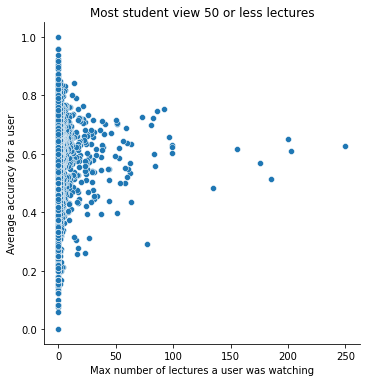

In [101]:
sns.relplot(data=user_lectures_accu, x='user_lectures_running_total', y='user_acc_mean')
plt.title("Most student view 50 or less lectures")
plt.xlabel("Max number of lectures a user was watching")
plt.ylabel("Average accuracy for a user")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

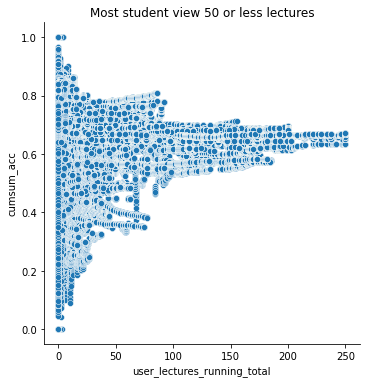

In [99]:
sns.relplot(data=train1, x='user_lectures_running_total', y='cumsum_acc')
plt.xlabel("How many lectures ")
plt.show

In [79]:
# Compute cumulative mean accuray for user 1864702

mask1864702 = train.user_id == 1864702
user_4702 = train[mask1864702]
user_4702 = pd.DataFrame(user_4702.answered_correctly.cumsum())
user_4702['num_question'] = range(1, 3342)
user_4702['cumsum_acc'] = user_4702.answered_correctly/user_4702.num_question
user_4702

,answered_correctly,num_question,cumsum_acc
0,1,1,1.000000
1,1,2,0.500000
2,2,3,0.666667
3,3,4,0.750000
4,3,5,0.600000
...,...,...,...
383137,2266,3337,0.679053
383138,2267,3338,0.679149
383139,2268,3339,0.679245
383140,2268,3340,0.679042


In [84]:
user_ids = train.user_id.unique()
user_ids

array([   1864702,    1960671,    3556553, ..., 1701129060, 1956774028,
       2145492661])

In [91]:
data = pd.DataFrame(columns = train.columns)

for user in tqdm(user_ids):
    mask = train.user_id == user
    df = train[mask]
    n = df.shape[0]
    user_cumacc = pd.DataFrame(df.answered_correctly.cumsum())
    user_cumacc['num_question'] = range(1, n+1)
    user_cumacc['cumsum_acc'] = user_cumacc.answered_correctly/user_cumacc.num_question
    data = data.append(user_cumacc)

100%|██████████| 2000/2000 [08:17<00:00,  4.02it/s]


In [96]:
cumsum_acc = data[['cumsum_acc']]
cumsum_acc

,cumsum_acc
0,1.000000
1,0.500000
2,0.666667
3,0.750000
4,0.600000
...,...
266729,0.923077
266730,0.888889
266731,0.857143
266732,0.827586


In [98]:
train1 = pd.concat([train, cumsum_acc], axis=1)

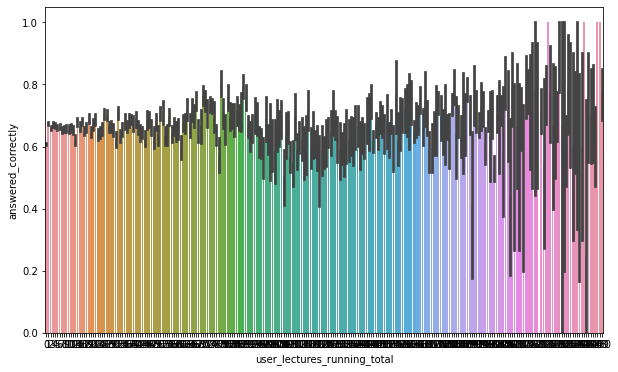

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='user_lectures_running_total', y='answered_correctly')
# plt.title("Student perform better with explanation")
plt.show()

In [112]:
df_ques.head()

,question_id,bundle_id,correct_answer,part,tags,tag_count
0,0,0,0,1,51 131 162 38,4
1,1,1,1,1,131 36 81,3
2,2,2,0,1,131 101 162 92,4
3,3,3,0,1,131 149 162 29,4
4,4,4,3,1,131 5 162 38,4


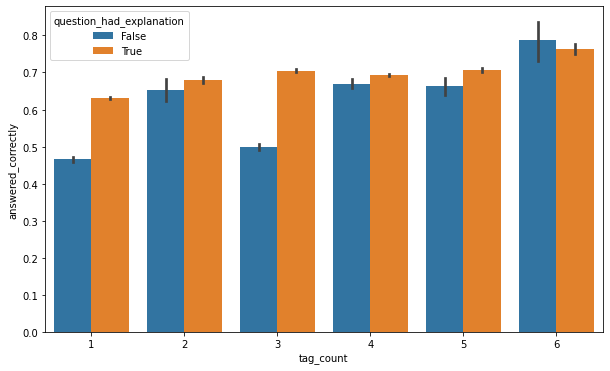

In [109]:
# How 

plt.figure(figsize=(10, 6))
sns.barplot(data=train, x='tag_count', y='answered_correctly', hue='question_had_explanation')
plt.show()

### Split the datasets by the value of target varible

In [104]:
# Create the group when the target variable equals 1
correct = (train.answered_correctly == 1)
correct = train[correct]

# Create the group when the target variable equals 0
incorrect = (train.answered_correctly == 0)
incorrect = train[incorrect]

# Print the shape of the two datasets
correct.shape, incorrect.shape

((262571, 24), (140806, 24))

In [105]:
# Inspect the dataframe 'correct'
correct.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_container_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy,sections,is_incomplete_sentence_part
0,0,1864702,5720,0,1,False,0.630049,0,45951.0,11917302.0,...,1,0.82,0.61,1.00,0.82,0.68,0.62,0.79,Reading,incomplete sentences
2,74342,1864702,4094,2,1,False,0.630049,0,22436.0,11917302.0,...,1,0.44,0.61,0.33,0.44,0.45,0.62,0.60,Reading,incomplete sentences
3,96778,1864702,9699,3,1,False,0.630049,0,36191.0,11917302.0,...,1,0.41,0.61,0.40,0.41,0.54,0.62,0.62,Reading,incomplete sentences
7,70707333,1864702,5577,19,1,True,0.630049,1,203236.0,11917302.0,...,1,0.77,0.61,1.00,0.77,0.63,0.62,0.63,Reading,incomplete sentences
8,70910569,1864702,4766,20,1,True,0.630049,1,178310.0,11917302.0,...,1,0.56,0.61,1.00,0.56,0.63,0.62,0.65,Reading,incomplete sentences


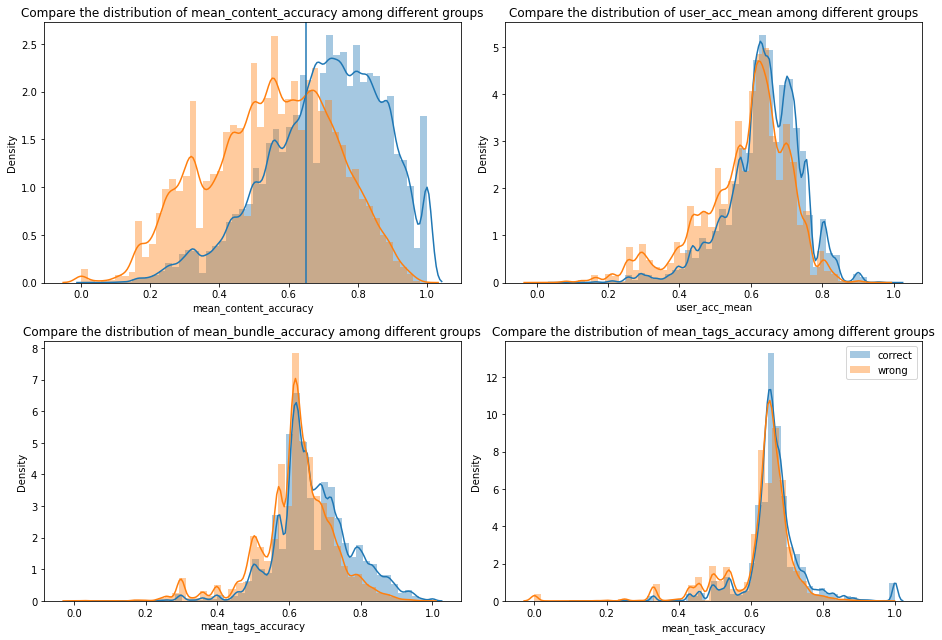

In [57]:
# mean_content_accuracy in different group

plt.figure(figsize=(13,9))

plt.subplot(221)
sns.distplot(correct.mean_content_accuracy, label='correct')
sns.distplot(wrong.mean_content_accuracy, label='wrong')
plt.title("Compare the distribution of mean_content_accuracy among different groups")
plt.axvline(x=0.65)

plt.subplot(222)
sns.distplot(correct.user_acc_mean, label='correct')
sns.distplot(wrong.user_acc_mean, label='wrong')
plt.title("Compare the distribution of user_acc_mean among different groups")

plt.subplot(223)
sns.distplot(correct.mean_tags_accuracy, label='correct')
sns.distplot(wrong.mean_tags_accuracy, label='wrong')
plt.title("Compare the distribution of mean_bundle_accuracy among different groups")

plt.subplot(224)
sns.distplot(correct.mean_task_accuracy, label='correct')
sns.distplot(wrong.mean_task_accuracy, label='wrong')
plt.title("Compare the distribution of mean_tags_accuracy among different groups")

plt.tight_layout()
plt.legend()
plt.show()

In [60]:
mask_above = correct.mean_content_accuracy >= 0.65
correct_above = correct[mask_above]
mask_below = correct.mean_content_accuracy < 0.65
correct_below = correct[mask_below]

correct_above.shape, correct_below.shape

((177492, 22), (85079, 22))

In [61]:
mask_above = wrong.mean_content_accuracy >= 0.65
wrong_above = wrong[mask_above]
mask_below = wrong.mean_content_accuracy < 0.65
wrong_below = wrong[mask_below]

wrong_above.shape, wrong_below.shape

((47356, 22), (93450, 22))

### Is this related to the content they have been tested on? 

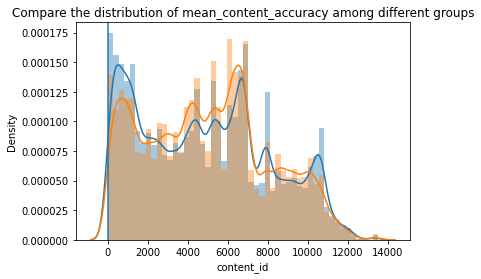

In [111]:
sns.distplot(correct.content_id, label='correct')
sns.distplot(wrong.content_id, label='wrong')
plt.title("Compare the distribution of mean_content_accuracy among different groups")
plt.axvline(x=0.65)
plt.show()

### Is it related to question_had_explanation? 

In [76]:
correct.question_had_explanation.value_counts(normalize=True)

True     0.915257
False    0.084743
Name: question_had_explanation, dtype: float64

In [75]:
wrong.question_had_explanation.value_counts(normalize=True)

True     0.851342
False    0.148658
Name: question_had_explanation, dtype: float64

### Is it related to q_time? 

In [80]:
correct.q_time.mean()

19112371.203982923

In [81]:
wrong.q_time.mean()

28528508.565238696

### subtract the users that use the apps for longer than 1 year

In [8]:
user_ids = train.user_id.unique()
user_ids

array([   1864702,    1960671,    3556553, ..., 1701129060, 1956774028,
       2145492661])

In [9]:
max(train.timestamp) > 31536000000

True

In [10]:
%%time

one_year_users = pd.DataFrame(columns = train.columns)

for user in user_ids:
    mask = (train.user_id == user)
    df = train[mask]
    if max(df.timestamp) > 31536000000:
        one_year_users = one_year_users.append(df)
    else:
        continue
        
one_year_users.shape

CPU times: user 2.81 s, sys: 395 ms, total: 3.2 s
Wall time: 2.05 s


(31848, 21)

In [11]:
# How many students use the apps over 1 year?
one_year_users.user_id.unique()

array([21063761, 279669912, 317212349, 345780563, 367462853, 441499543,
       551516464, 553541941, 570790419, 667485142, 781118312, 826778211,
       830595699, 861083351, 870781172, 922820858, 958735286, 988375485,
       1012029730, 1061991533, 1069796608, 1148936784, 1160059620,
       1213440001, 1413058943, 1442485436, 1472234878, 1533584643,
       1685245219, 1698919904, 1818053521, 1956346780, 2002876798,
       2036479106, 1040963081], dtype=object)

In [12]:
# Who has the largest rows
one_year_users.groupby('user_id').user_id.count().sort_values(ascending=False).head()

user_id
1818053521    5371
861083351     3706
1413058943    3262
667485142     3060
21063761      2559
Name: user_id, dtype: int64

In [13]:
one_year_users.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,bundle_id,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
1375,370801,21063761,4492,8,1,False,0.705364,0,40415.0,12374745.0,...,4492,5,80,1,0.44,0.61,0.44,0.51,0.62,0.55
1376,411216,21063761,4120,9,1,False,0.705364,0,34878.0,12374745.0,...,4120,5,123,1,0.27,0.61,0.27,0.46,0.62,0.51
1377,446094,21063761,4696,10,1,False,0.705364,0,19551.0,12374745.0,...,4696,5,133,1,0.55,0.61,0.55,0.55,0.62,0.61
1378,465645,21063761,6116,11,0,False,0.705364,0,84689.0,12374745.0,...,6116,5,23,1,0.30,0.61,0.30,0.46,0.62,0.40
1379,550334,21063761,6173,12,1,False,0.705364,0,75423.0,12374745.0,...,6173,5,151,1,0.32,0.61,0.32,0.49,0.62,0.49


In [14]:
mask = (one_year_users.user_id == 861083351)
student = one_year_users[mask]
# student = student.set_index('timestamp')
student.head()

,timestamp,user_id,content_id,task_container_id,answered_correctly,question_had_explanation,user_acc_mean,user_lectures_running_total,q_time,avg_user_q_time,...,bundle_id,part,tags,tag_count,mean_bundle_accuracy,mean_part_accuracy,mean_content_accuracy,mean_task_accuracy,mean_tagcount_accuracy,mean_tags_accuracy
68239,437923,861083351,4492,8,1,False,0.701624,0,24480.0,15197743.0,...,4492,5,80,1,0.44,0.61,0.44,0.51,0.62,0.55
68240,462403,861083351,4120,9,1,False,0.701624,0,26818.0,15197743.0,...,4120,5,123,1,0.27,0.61,0.27,0.46,0.62,0.51
68241,489221,861083351,4696,10,0,False,0.701624,0,15854.0,15197743.0,...,4696,5,133,1,0.55,0.61,0.55,0.55,0.62,0.61
68242,505075,861083351,6116,11,0,False,0.701624,0,19970.0,15197743.0,...,6116,5,23,1,0.30,0.61,0.30,0.46,0.62,0.40
68243,525045,861083351,6173,12,1,False,0.701624,0,18360.0,15197743.0,...,6173,5,151,1,0.32,0.61,0.32,0.49,0.62,0.49


In [74]:
df_ques.head()

,question_id,bundle_id,correct_answer,part,tags,tag_count
0,0,0,0,1,51 131 162 38,4
1,1,1,1,1,131 36 81,3
2,2,2,0,1,131 101 162 92,4
3,3,3,0,1,131 149 162 29,4
4,4,4,3,1,131 5 162 38,4


In [18]:
map_dict = {1: "Photographs", 
            2: "Question-Response", 
            3: "Conversations", 
            4: "Talks", 
            5: "Incomplete Sentences", 
            6: "Text Completion", 
            7: "Passages"}

In [23]:
part = student.groupby('part').answered_correctly.agg(['count', 'sum'])
part['accuracy'] = part['sum']/part['count']
part = part.reset_index()
part['part_content'] = part.part.map(map_dict)
part.sort_values(by='accuracy')

,part,count,sum,accuracy,part_content
4,5,1647,1099,0.667274,Incomplete Sentences
5,6,910,660,0.725275,Text Completion
3,4,212,158,0.745283,Talks
2,3,424,340,0.801887,Conversations
6,7,204,166,0.813725,Passages
1,2,210,177,0.842857,Question-Response
0,1,99,87,0.878788,Photographs


In [24]:
content = student.groupby('tags').answered_correctly.agg(['count', 'sum'])
content['accuracy'] = content['sum']/content['count']
content.sort_values(['count','accuracy'])

,count,sum,accuracy
tags,,,
100 148 38 102,1,0,0.000000
106 12 29,1,0,0.000000
106 126 162 92,1,0,0.000000
106 183 162 29,1,0,0.000000
106 81 29,1,0,0.000000
...,...,...,...
96,94,61,0.648936
1,139,91,0.654676
53,159,114,0.716981


In [31]:
mask = (content.accuracy == 0)
tags_poor = content[mask]
tags_poor = tags_poor.reset_index()
tags_poor

,tags,count,sum,accuracy
0,100 148 38 102,1,0,0.0
1,106 12 29,1,0,0.0
2,106 126 162 92,1,0,0.0
3,106 126 29,2,0,0.0
4,106 183 162 29,1,0,0.0
...,...,...,...,...
61,84 76 42 135 162,1,0,0.0
62,84 97 16 22 122,2,0,0.0
63,9 10 29,1,0,0.0
64,97 42 21,1,0,0.0


In [71]:
tags_poor.tags.str.split(" ", expand=True).melt().value.value_counts()

162    17
92     17
38     14
29     14
81     11
       ..
61      1
148     1
144     1
20      1
90      1
Name: value, Length: 75, dtype: int64

In [67]:
df_lects.head()

,lecture_id,tag,part,type_of,part_content
0,89,159,5,concept,Incomplete Sentences
1,100,70,1,concept,Photographs
2,185,45,6,concept,Text Completion
3,192,79,5,solving question,Incomplete Sentences
4,317,156,5,solving question,Incomplete Sentences


In [73]:
mask = df_lects.tag == 61
df_lects[mask]

,lecture_id,tag,part,type_of,part_content
132,11236,61,1,solving question,Photographs
155,13384,61,1,solving question,Photographs
342,27400,61,1,solving question,Photographs
371,29680,61,1,concept,Photographs


In [69]:
mask = df_lects.part == 5
df_lects[mask]

,lecture_id,tag,part,type_of,part_content
0,89,159,5,concept,Incomplete Sentences
3,192,79,5,solving question,Incomplete Sentences
4,317,156,5,solving question,Incomplete Sentences
6,484,179,5,concept,Incomplete Sentences
9,814,80,5,solving question,Incomplete Sentences
...,...,...,...,...,...
401,31763,116,5,solving question,Incomplete Sentences
403,32018,172,5,concept,Incomplete Sentences
406,32135,64,5,solving question,Incomplete Sentences
412,32491,179,5,solving question,Incomplete Sentences


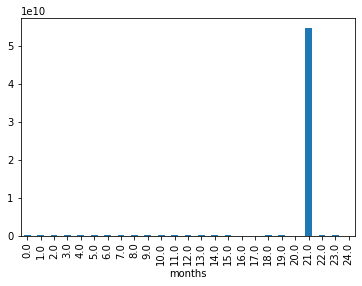

In [57]:
df = explore.feature_over_time('user_acc_mean', one_year_users, 'mean')
df.groupby('months').q_time.mean().plot(kind='bar')
plt.show()